# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
pip install citipy

     |████████████████████████████████| 557 kB 3.1 MB/s eta 0:00:01
  Created wheel for citipy: filename=citipy-0.0.5-py3-none-any.whl size=559701 sha256=53cfe784d6557ace1060ce31db9cd066472bb9bdbbc857f399d8de0bda019685
  Stored in directory: /Users/kseniadyakova/Library/Caches/pip/wheels/eb/07/14/1c448d9fabf3aceac66270933ecae15693974a1b7f91266841
Successfully built citipy
Note: you may need to restart the kernel to use updated packages.


In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
import random
from citipy import citipy

import requests
import json

# Import API key
# OpenWeatherMap API Key
from api_keys import weather_api_key
# Google API Key
from api_keys import g_key

## Generate Cities List

In [3]:
lat_lngs = []
cities = []

#random lat and lng combinations

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    if city not in cities:
        cities.append(city)
len(cities)

612

In [4]:
cities_df=pd.DataFrame(cities)
cities_df.shape

(612, 1)

In [5]:
cities_df.columns=["City"]
cities_df["Country"] = ""
cities_df["Lat"] = ""
cities_df["Lng"] = ""
cities_df["Temp (F)"] = ""
cities_df["Humidity"] = ""
cities_df["Wind Speed (mph)"] = ""
cities_df["Cloudiness"] = ""
cities_df["Date"] = ""

cities_df.head()

,City,Country,Lat,Lng,Temp (F),Humidity,Wind Speed (mph),Cloudiness,Date
0,victoria,,,,,,,,
1,gravdal,,,,,,,,
2,vaasa,,,,,,,,
3,qaanaaq,,,,,,,,
4,hermanus,,,,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
city_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# partial query URL
query_url = f"{city_url}appid={weather_api_key}&units={units}&q="

cities = cities_df["City"]

for index, row in cities_df.iterrows():
    
    city = row["City"]
    
    response = requests.get(query_url + city)
    city_info = response.json()
    
    #print(json.dumps(city_info, indent=3, sort_keys=True))
    try:
        print(f"Processing Record {(index+1)%50} of Set {(index+1)//50+1} | {cities[index]}")
        cities_df.loc[index, "Country"] = city_info['sys']['country']
        cities_df.loc[index, "Lat"] = city_info['coord']['lat']
        cities_df.loc[index, "Lng"] = city_info['coord']['lon']
        cities_df.loc[index, "Temp (F)"] = city_info['main']['temp']
        cities_df.loc[index, "Humidity"] = city_info['main']['humidity']
        cities_df.loc[index, "Wind Speed (mph)"] = city_info['wind']['speed']
        cities_df.loc[index, "Cloudiness"] = city_info['clouds']['all']
        cities_df.loc[index, "Date"] = city_info['dt']
        
    except Exception:
        print("Missing city. Skipping...")
    



Processing Record 1 of Set 1 | victoria
Processing Record 2 of Set 1 | gravdal
Processing Record 3 of Set 1 | vaasa
Processing Record 4 of Set 1 | qaanaaq
Processing Record 5 of Set 1 | hermanus
Processing Record 6 of Set 1 | atuona
Processing Record 7 of Set 1 | amderma
Missing city. Skipping...
Processing Record 8 of Set 1 | new norfolk
Processing Record 9 of Set 1 | cape town
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | saskylakh
Processing Record 12 of Set 1 | bianzhuang
Processing Record 13 of Set 1 | saint-philippe
Processing Record 14 of Set 1 | luderitz
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | barrow
Processing Record 17 of Set 1 | cockburn town
Processing Record 18 of Set 1 | swellendam
Processing Record 19 of Set 1 | bend
Processing Record 20 of Set 1 | jamestown
Processing Record 21 of Set 1 | klaksvik
Processing Record 22 of Set 1 | te anau
Processing Record 23 of Set 1 | puerto escondido
Processing Record 24 of Se

Processing Record 39 of Set 4 | sayyan
Processing Record 40 of Set 4 | jalu
Processing Record 41 of Set 4 | marcona
Missing city. Skipping...
Processing Record 42 of Set 4 | ouallam
Processing Record 43 of Set 4 | san fernando
Processing Record 44 of Set 4 | satitoa
Missing city. Skipping...
Processing Record 45 of Set 4 | haines junction
Processing Record 46 of Set 4 | yambio
Processing Record 47 of Set 4 | khatanga
Processing Record 48 of Set 4 | flinders
Processing Record 49 of Set 4 | hilo
Processing Record 0 of Set 5 | okha
Processing Record 1 of Set 5 | samarai
Processing Record 2 of Set 5 | upernavik
Processing Record 3 of Set 5 | umzimvubu
Missing city. Skipping...
Processing Record 4 of Set 5 | tumannyy
Missing city. Skipping...
Processing Record 5 of Set 5 | palamos
Processing Record 6 of Set 5 | port lincoln
Processing Record 7 of Set 5 | ahipara
Processing Record 8 of Set 5 | marsabit
Processing Record 9 of Set 5 | barabai
Processing Record 10 of Set 5 | aksu
Processing Rec

Processing Record 26 of Set 8 | asfi
Processing Record 27 of Set 8 | palmer
Processing Record 28 of Set 8 | jinji
Processing Record 29 of Set 8 | kuche
Missing city. Skipping...
Processing Record 30 of Set 8 | rungata
Missing city. Skipping...
Processing Record 31 of Set 8 | garissa
Processing Record 32 of Set 8 | yakima
Processing Record 33 of Set 8 | dunedin
Processing Record 34 of Set 8 | cabo san lucas
Processing Record 35 of Set 8 | norman wells
Processing Record 36 of Set 8 | yuzhno-yeniseyskiy
Missing city. Skipping...
Processing Record 37 of Set 8 | grindavik
Processing Record 38 of Set 8 | balakhninskiy
Processing Record 39 of Set 8 | strezhevoy
Processing Record 40 of Set 8 | iqaluit
Processing Record 41 of Set 8 | slave lake
Processing Record 42 of Set 8 | egvekinot
Processing Record 43 of Set 8 | ternate
Processing Record 44 of Set 8 | novokizhinginsk
Processing Record 45 of Set 8 | moron
Processing Record 46 of Set 8 | khandyga
Processing Record 47 of Set 8 | kijang
Proces

Processing Record 12 of Set 12 | ponta delgada
Processing Record 13 of Set 12 | lagoa
Processing Record 14 of Set 12 | bhera
Processing Record 15 of Set 12 | moratuwa
Processing Record 16 of Set 12 | nenjiang
Processing Record 17 of Set 12 | necochea
Processing Record 18 of Set 12 | rafai
Processing Record 19 of Set 12 | kamenskoye
Missing city. Skipping...
Processing Record 20 of Set 12 | lokosovo
Processing Record 21 of Set 12 | lazaro cardenas
Processing Record 22 of Set 12 | srednekolymsk
Processing Record 23 of Set 12 | kupang
Processing Record 24 of Set 12 | dzhusaly
Missing city. Skipping...
Processing Record 25 of Set 12 | yaan
Processing Record 26 of Set 12 | juarez
Processing Record 27 of Set 12 | finschhafen
Processing Record 28 of Set 12 | lusambo
Processing Record 29 of Set 12 | pochutla
Processing Record 30 of Set 12 | kabanga
Processing Record 31 of Set 12 | kangaatsiaq
Processing Record 32 of Set 12 | dwarka
Processing Record 33 of Set 12 | dingle
Processing Record 34 o

In [7]:
cities_df.head()

,City,Country,Lat,Lng,Temp (F),Humidity,Wind Speed (mph),Cloudiness,Date
0,victoria,HK,22.29,114.16,72.46,82,1.01,57,1603738534
1,gravdal,NO,68.12,13.5,48.2,70,20.8,75,1603738806
2,vaasa,FI,63.1,21.62,46.22,100,8.05,90,1603738807
3,qaanaaq,GL,77.48,-69.36,8.2,74,9.19,88,1603738601
4,hermanus,ZA,-34.42,19.23,64,85,5.01,100,1603738807


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [24]:
#  Get the indices of cities that have humidity over 100%.
dirty_city = cities_df[(cities_df["Humidity"] > 100)].index
dirty_city

# result is 0

Int64Index([], dtype='int64')

In [25]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = cities_df.drop(dirty_city, inplace=False)
clean_city_data.head()


,City,Country,Lat,Lng,Temp (F),Humidity,Wind Speed (mph),Cloudiness,Date
0,victoria,HK,22.29,114.16,72.46,82.0,1.01,57.0,1.603739e+09
1,gravdal,NO,68.12,13.50,48.20,70.0,20.80,75.0,1.603739e+09
2,vaasa,FI,63.10,21.62,46.22,100.0,8.05,90.0,1.603739e+09
3,qaanaaq,GL,77.48,-69.36,8.20,74.0,9.19,88.0,1.603739e+09
4,hermanus,ZA,-34.42,19.23,64.00,85.0,5.01,100.0,1.603739e+09


In [29]:
lats = clean_city_data["Lat"]
max_temps = clean_city_data["Temp (F)"]
humidity = clean_city_data["Humidity"]
cloudiness = clean_city_data["Cloudiness"]
wind_speed = clean_city_data["Wind Speed (mph)"]

clean_city_data.to_csv("Output/cities.csv", index_label="City_ID")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

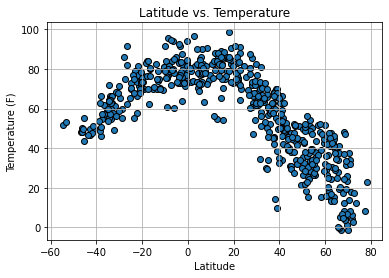

In [34]:
plt.scatter(lats, max_temps, edgecolor="black")


plt.title("Latitude vs. Temperature")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/lat_temp.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

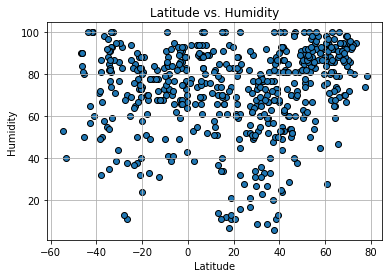

In [35]:
plt.scatter(lats, humidity, edgecolor="black")


plt.title("Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/lat_hum.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

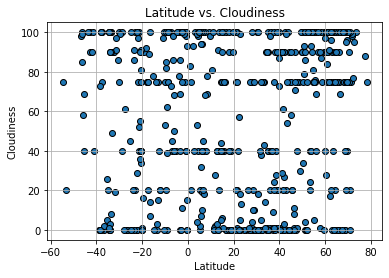

In [36]:
plt.scatter(lats, cloudiness, edgecolor="black")


plt.title("Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/lat_cloud.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

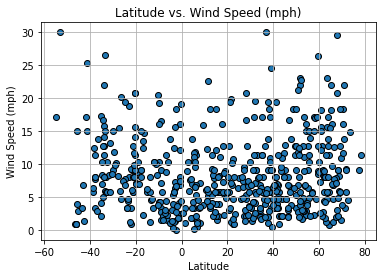

In [37]:
plt.scatter(lats, wind_speed, edgecolor="black")


plt.title("Latitude vs. Wind Speed (mph)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Output/lat_wind.png")

# Show plot
plt.show()

## Linear Regression

In [41]:
# Create Northern and Southern Hemisphere DataFrames
nh_df = clean_city_data.loc[(clean_city_data["Lat"] >= 0)]
sh_df = clean_city_data.loc[(clean_city_data["Lat"] < 0)]

In [42]:
nh_df.head()

,City,Country,Lat,Lng,Temp (F),Humidity,Wind Speed (mph),Cloudiness,Date
0,victoria,HK,22.29,114.16,72.46,82.0,1.01,57.0,1.603739e+09
1,gravdal,NO,68.12,13.50,48.20,70.0,20.80,75.0,1.603739e+09
2,vaasa,FI,63.10,21.62,46.22,100.0,8.05,90.0,1.603739e+09
3,qaanaaq,GL,77.48,-69.36,8.20,74.0,9.19,88.0,1.603739e+09
10,saskylakh,RU,71.92,114.08,4.06,93.0,5.88,98.0,1.603739e+09


In [43]:
sh_df.head()

,City,Country,Lat,Lng,Temp (F),Humidity,Wind Speed (mph),Cloudiness,Date
4,hermanus,ZA,-34.42,19.23,64.00,85.0,5.01,100.0,1.603739e+09
5,atuona,PF,-9.80,-139.03,79.14,73.0,19.33,85.0,1.603739e+09
7,new norfolk,AU,-42.78,147.06,46.58,65.0,1.36,100.0,1.603739e+09
8,cape town,ZA,-33.93,18.42,66.61,77.0,11.41,0.0,1.603739e+09
9,busselton,AU,-33.65,115.33,54.72,74.0,5.95,8.0,1.603739e+09


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.753937052734239


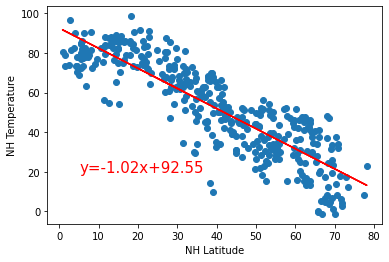

In [49]:
x_values = nh_df["Lat"]
y_values = nh_df["Temp (F)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values*slope+intercept
line_eq = "y="+str(round(slope, 2))+"x+"+str(round(intercept, 2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (5,20), fontsize=15, color="red")
plt.xlabel("NH Latitude")
plt.ylabel("NH Temperature")
print(f"The r-value is: {rvalue**2}")

# Save the figure
plt.savefig("Output/reg_nh_lat_temp.png")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6269902407983186


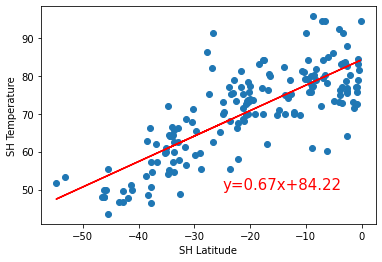

In [51]:
x_values = sh_df["Lat"]
y_values = sh_df["Temp (F)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values*slope+intercept
line_eq = "y="+str(round(slope, 2))+"x+"+str(round(intercept, 2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-25,50), fontsize=15, color="red")
plt.xlabel("SH Latitude")
plt.ylabel("SH Temperature")
print(f"The r-value is: {rvalue**2}")

# Save the figure
plt.savefig("Output/reg_sh_lat_temp.png")

# Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.08563073059219399


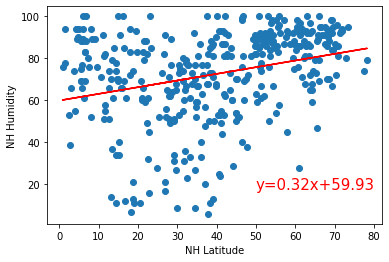

In [54]:
x_values = nh_df["Lat"]
y_values = nh_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values*slope+intercept
line_eq = "y="+str(round(slope, 2))+"x+"+str(round(intercept, 2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (50,18), fontsize=15, color="red")
plt.xlabel("NH Latitude")
plt.ylabel("NH Humidity")
print(f"The r-value is: {rvalue**2}")

# Save the figure
plt.savefig("Output/reg_nh_lat_hum.png")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.000505753166008579


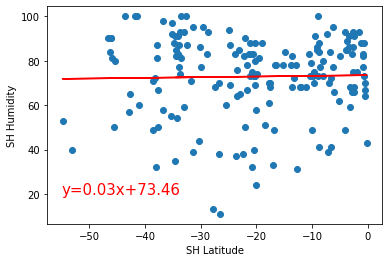

In [56]:
x_values = sh_df["Lat"]
y_values = sh_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values*slope+intercept
line_eq = "y="+str(round(slope, 2))+"x+"+str(round(intercept, 2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-55,20), fontsize=15, color="red")
plt.xlabel("SH Latitude")
plt.ylabel("SH Humidity")
print(f"The r-value is: {rvalue**2}")

# Save the figure
plt.savefig("Output/reg_sh_lat_hum.png")

# Show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.06886790403479211


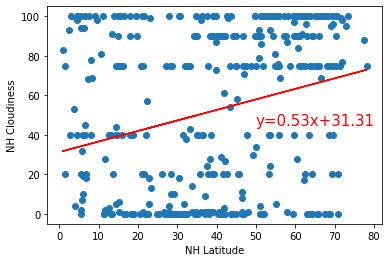

In [58]:
x_values = nh_df["Lat"]
y_values = nh_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values*slope+intercept
line_eq = "y="+str(round(slope, 2))+"x+"+str(round(intercept, 2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (50,45), fontsize=15, color="red")
plt.xlabel("NH Latitude")
plt.ylabel("NH Cloudiness")
print(f"The r-value is: {rvalue**2}")

# Save the figure
plt.savefig("Output/reg_nh_lat_cloud.png")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0034803157227000342


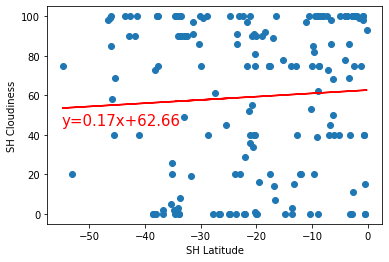

In [61]:
x_values = sh_df["Lat"]
y_values = sh_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values*slope+intercept
line_eq = "y="+str(round(slope, 2))+"x+"+str(round(intercept, 2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-55,45), fontsize=15, color="red")
plt.xlabel("SH Latitude")
plt.ylabel("SH Cloudiness")
print(f"The r-value is: {rvalue**2}")

# Save the figure
plt.savefig("Output/reg_sh_lat_cloud.png")

# Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.043813442506206196


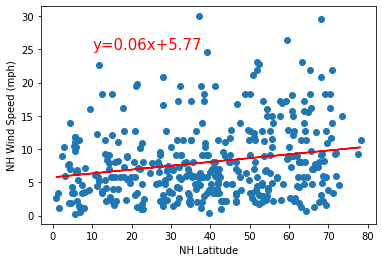

In [63]:
x_values = nh_df["Lat"]
y_values = nh_df["Wind Speed (mph)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values*slope+intercept
line_eq = "y="+str(round(slope, 2))+"x+"+str(round(intercept, 2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (10,25), fontsize=15, color="red")
plt.xlabel("NH Latitude")
plt.ylabel("NH Wind Speed (mph)")
print(f"The r-value is: {rvalue**2}")

# Save the figure
plt.savefig("Output/reg_nh_lat_wind.png")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.05127073395790998


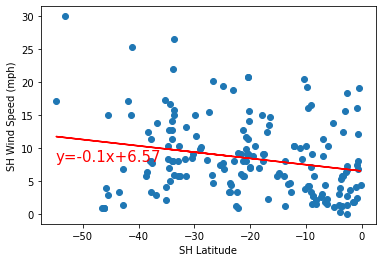

In [66]:
x_values = sh_df["Lat"]
y_values = sh_df["Wind Speed (mph)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values*slope+intercept
line_eq = "y="+str(round(slope, 2))+"x+"+str(round(intercept, 2))

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (-55,8), fontsize=15, color="red")
plt.xlabel("SH Latitude")
plt.ylabel("SH Wind Speed (mph)")
print(f"The r-value is: {rvalue**2}")

# Save the figure
plt.savefig("Output/reg_sh_lat_wind.png")

# Show plot
plt.show()